## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap NULL scan (insane)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [39]:
directory = '/home/user/notebooks/pcaps/nmap_null_scan_insane'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [41]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    0.056938
Name: time, dtype: float64

In [42]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [43]:
scan_times
#duration_list

0    0.056938
1    0.067693
2    0.058478
3    0.071967
4    0.073104
5    0.069887
6    0.065902
7    0.071698
8    0.055218
9    0.064497
Name: Scan times, dtype: float64

In [44]:
temp = pd.DataFrame(duration_list)

In [45]:
temp.mean()

0    0.065538
dtype: float64

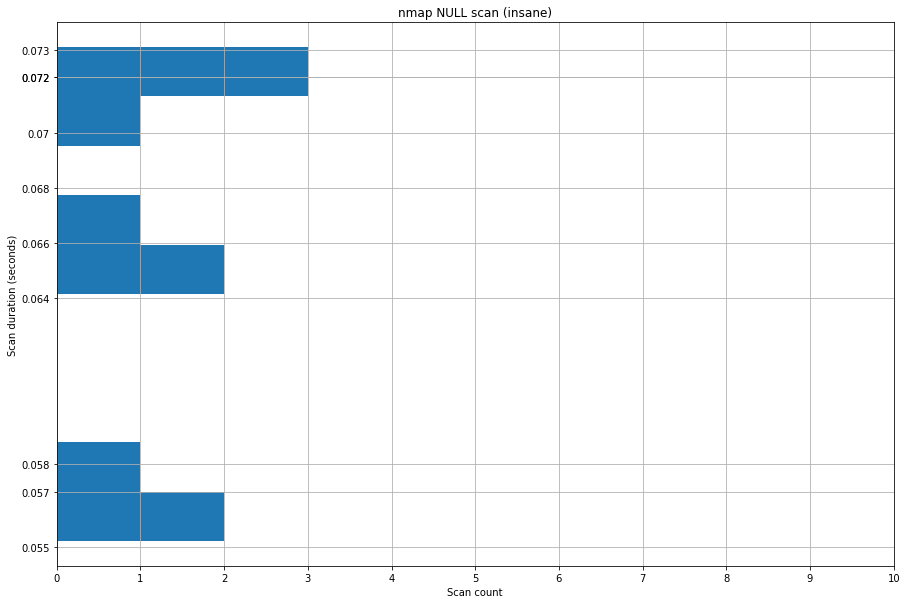

In [46]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [47]:
temp.describe()

,0
count,10.000000
mean,0.065538
std,0.006596
min,0.055218
25%,0.059983
50%,0.066797
75%,0.071245
max,0.073104


## Packet count

In [48]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [49]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [50]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 1310.7633590698242



## Order of ports scanned


In [51]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 37238 1720
2 37238 995
3 37238 110
4 37238 143
5 37238 445
6 37238 80
7 37238 256
8 37238 554
9 37238 3306
10 37238 8080
11 37238 22
12 37238 23
13 37238 199
14 37238 1025
15 37238 113
16 37238 53
17 37238 25
18 37238 993
19 37238 8888
20 37238 443
21 37238 135
22 37238 111
23 37238 3389
24 37238 587
25 37238 1723
26 37238 139
27 37238 5900
28 37238 21
29 37238 3995
30 37238 2401
31 37238 5280
32 37238 625
33 37238 7443
34 37238 1972
35 37238 10025
36 37238 5200
37 37238 777
38 37238 8042
39 37238 3324
40 37238 8652
41 37238 8500
42 37238 44501
43 37238 1045
44 37238 49159
45 37238 9415
46 37238 5009
47 37238 49176
48 37238 222
49 37238 1287
50 37238 2035
51 37238 8083
52 37238 8086
53 37238 5555
54 37238 3703
55 37238 10000
56 37238 10003
57 37238 4550
58 37238 2191
59 37238 1098
60 37238 5633
61 37238 55055
62 37238 10009
63 37238 5815
64 37238 1755
65 37238 1079
66 37238 3404
67 37238 1078
68 37238 8001
69 37238 1334
70 37238 3659
71 37238 19780
72 37238 51493
73 37238 2121
74 372

621 37238 3801
622 37238 1248
623 37238 4111
624 37238 1839
625 37238 416
626 37238 1443
627 37238 32781
628 37238 50800
629 37238 1301
630 37238 6667
631 37238 3283
632 37238 6789
633 37238 10024
634 37238 4003
635 37238 4224
636 37238 1862
637 37238 3300
638 37238 301
639 37238 783
640 37238 1533
641 37238 9968
642 37238 56738
643 37238 16001
644 37238 1309
645 37238 5004
646 37238 8291
647 37238 2010
648 37238 8873
649 37238 8292
650 37238 458
651 37238 1038
652 37238 5666
653 37238 5431
654 37238 7004
655 37238 2222
656 37238 1058
657 37238 3800
658 37238 2126
659 37238 3880
660 37238 5222
661 37238 5959
662 37238 8800
663 37238 212
664 37238 900
665 37238 9876
666 37238 5801
667 37238 5405
668 37238 1060
669 37238 6003
670 37238 3017
671 37238 3889
672 37238 9999
673 37238 3476
674 37238 1083
675 37238 1
676 37238 5002
677 37238 1199
678 37238 10243
679 37238 1761
680 37238 1494
681 37238 61900
682 37238 1721
683 37238 6567
684 37238 1840
685 37238 340
686 37238 52822
687 37238 99

483 36298 280
484 36298 254
485 36298 5102
486 36298 5033
487 36298 9003
488 36298 5825
489 36298 1081
490 36298 1097
491 36298 4126
492 36298 2030
493 36298 6547
494 36298 1067
495 36298 1700
496 36298 9998
497 36298 1461
498 36298 5002
499 36298 5214
500 36298 1044
501 36298 2170
502 36298 37
503 36298 9877
504 36298 50500
505 36298 465
506 36298 427
507 36298 2045
508 36298 27356
509 36298 24800
510 36298 5906
511 36298 10003
512 36298 49157
513 36298 1085
514 36298 8088
515 36298 7443
516 36298 15003
517 36298 1148
518 36298 1070
519 36298 513
520 36298 30000
521 36298 12345
522 36298 4446
523 36298 49155
524 36298 5962
525 36298 211
526 36298 9594
527 36298 7512
528 36298 49999
529 36298 6389
530 36298 259
531 36298 8443
532 36298 2381
533 36298 8300
534 36298 3905
535 36298 5631
536 36298 6001
537 36298 1192
538 36298 722
539 36298 6510
540 36298 9900
541 36298 32768
542 36298 27715
543 36298 23502
544 36298 5922
545 36298 3920
546 36298 1086
547 36298 2005
548 36298 1114
549 362

86 36013 11110
87 36013 10003
88 36013 4003
89 36013 1088
90 36013 1069
91 36013 1310
92 36013 3006
93 36013 981
94 36013 593
95 36013 16012
96 36013 109
97 36013 2010
98 36013 1022
99 36013 8383
100 36013 3659
101 36013 2022
102 36013 5850
103 36013 35500
104 36013 9002
105 36013 10082
106 36013 5214
107 36013 8011
108 36013 407
109 36013 6003
110 36013 5678
111 36013 49156
112 36013 1594
113 36013 1236
114 36013 3998
115 36013 1455
116 36013 6839
117 36013 32771
118 36013 1084
119 36013 18988
120 36013 5925
121 36013 1166
122 36013 2033
123 36013 3918
124 36013 3945
125 36013 3889
126 36013 61532
127 36013 43
128 36013 5030
129 36013 1277
130 36013 1247
131 36013 4002
132 36013 1041
133 36013 2260
134 36013 9593
135 36013 8031
136 36013 5730
137 36013 1130
138 36013 1947
139 36013 7921
140 36013 2910
141 36013 3128
142 36013 3766
143 36013 5952
144 36013 12265
145 36013 5100
146 36013 3007
147 36013 902
148 36013 5961
149 36013 1132
150 36013 5999
151 36013 49
152 36013 5910
153 3601

649 36013 481
650 36013 34573
651 36013 34572
652 36013 9010
653 36013 8090
654 36013 800
655 36013 8192
656 36013 5298
657 36013 52869
658 36013 5440
659 36013 1089
660 36013 1072
661 36013 1600
662 36013 2702
663 36013 5960
664 36013 8290
665 36013 1972
666 36013 65000
667 36013 3268
668 36013 83
669 36013 7512
670 36013 8181
671 36013 2048
672 36013 5566
673 36013 1096
674 36013 6789
675 36013 3031
676 36013 1218
677 36013 5679
678 36013 1063
679 36013 5950
680 36013 1259
681 36013 1097
682 36013 9080
683 36013 6646
684 36013 27353
685 36013 3828
686 36013 1311
687 36013 8500
688 36013 2065
689 36013 12174
690 36013 7201
691 36013 6
692 36013 42510
693 36013 2200
694 36013 990
695 36013 2001
696 36013 8009
697 36013 2046
698 36013 50500
699 36013 5060
700 36013 50003
701 36013 301
702 36013 7200
703 36013 6779
704 36013 1248
705 36013 3404
706 36013 211
707 36013 49154
708 36013 1050
709 36013 666
710 36013 3005
711 36013 1062
712 36013 9290
713 36013 2251
714 36013 9500
715 36013 2

798 46878 1271
799 46878 30
800 46878 28201
801 46878 6566
802 46878 1301
803 46878 49
804 46878 56737
805 46878 15004
806 46878 2366
807 46878 40193
808 46878 8222
809 46878 7627
810 46878 544
811 46878 5815
812 46878 2875
813 46878 1782
814 46878 4224
815 46878 38292
816 46878 1081
817 46878 1033
818 46878 32780
819 46878 524
820 46878 1840
821 46878 2170
822 46878 6003
823 46878 33
824 46878 2525
825 46878 2040
826 46878 1009
827 46878 464
828 46878 8400
829 46878 10215
830 46878 1971
831 46878 4045
832 46878 9535
833 46878 1122
834 46878 1119
835 46878 726
836 46878 8402
837 46878 902
838 46878 5915
839 46878 9878
840 46878 6004
841 46878 1067
842 46878 8001
843 46878 5862
844 46878 9593
845 46878 3476
846 46878 8300
847 46878 8093
848 46878 14441
849 46878 1524
850 46878 8021
851 46878 541
852 46878 981
853 46878 555
854 46878 9081
855 46878 513
856 46878 4125
857 46878 1233
858 46878 4567
859 46878 1718
860 46878 301
861 46878 7443
862 46878 19315
863 46878 9877
864 46878 1130
86

921 47096 2000
922 47096 9535
923 47096 2105
924 47096 1066
925 47096 61532
926 47096 555
927 47096 10215
928 47096 1060
929 47096 280
930 47096 8899
931 47096 43
932 47096 4045
933 47096 57797
934 47096 1065
935 47096 5998
936 47096 24800
937 47096 1201
938 47096 2100
939 47096 32770
940 47096 9900
941 47096 8045
942 47096 27715
943 47096 12174
944 47096 2800
945 47096 49167
946 47096 50800
947 47096 1148
948 47096 1600
949 47096 3011
950 47096 9011
951 47096 57294
952 47096 15660
953 47096 26
954 47096 3809
955 47096 1007
956 47096 6667
957 47096 9929
958 47096 2161
959 47096 2251
960 47096 7025
961 47096 1114
962 47096 2401
963 47096 54045
964 47096 1863
965 47096 2869
966 47096 14442
967 47096 5679
968 47096 32768
969 47096 765
970 47096 2717
971 47096 1236
972 47096 6389
973 47096 5414
974 47096 9207
975 47096 8649
976 47096 2135
977 47096 1092
978 47096 1277
979 47096 2099
980 47096 7999
981 47096 7000
982 47096 2525
983 47096 8994
984 47096 8009
985 47096 49154
986 47096 5907
98

482 54196 5666
483 54196 1065
484 54196 6668
485 54196 6101
486 54196 3030
487 54196 5802
488 54196 30000
489 54196 5009
490 54196 13783
491 54196 7496
492 54196 16018
493 54196 44176
494 54196 2179
495 54196 55600
496 54196 4662
497 54196 1
498 54196 7778
499 54196 1166
500 54196 37
501 54196 765
502 54196 8086
503 54196 2003
504 54196 25735
505 54196 8045
506 54196 2170
507 54196 9102
508 54196 5190
509 54196 2710
510 54196 9220
511 54196 1074
512 54196 1461
513 54196 5960
514 54196 32783
515 54196 6389
516 54196 1011
517 54196 783
518 54196 3333
519 54196 1151
520 54196 515
521 54196 1805
522 54196 1094
523 54196 1098
524 54196 5988
525 54196 4900
526 54196 2607
527 54196 7676
528 54196 2811
529 54196 57294
530 54196 15003
531 54196 9099
532 54196 30951
533 54196 1009
534 54196 9000
535 54196 902
536 54196 56737
537 54196 3828
538 54196 5859
539 54196 1070
540 54196 2601
541 54196 3372
542 54196 2022
543 54196 1271
544 54196 3476
545 54196 1971
546 54196 50300
547 54196 548
548 5419

127 37947 7911
128 37947 1099
129 37947 8873
130 37947 24800
131 37947 9943
132 37947 2035
133 37947 1721
134 37947 1658
135 37947 1040
136 37947 3390
137 37947 1494
138 37947 6543
139 37947 3869
140 37947 9207
141 37947 10215
142 37947 65389
143 37947 3005
144 37947 417
145 37947 19283
146 37947 8300
147 37947 55600
148 37947 3659
149 37947 49163
150 37947 3030
151 37947 3031
152 37947 1500
153 37947 3527
154 37947 7625
155 37947 3703
156 37947 57294
157 37947 144
158 37947 60020
159 37947 2161
160 37947 1717
161 37947 9009
162 37947 1055
163 37947 2190
164 37947 19842
165 37947 1110
166 37947 3995
167 37947 1100
168 37947 4550
169 37947 4004
170 37947 8443
171 37947 9502
172 37947 125
173 37947 714
174 37947 4000
175 37947 2710
176 37947 2048
177 37947 34573
178 37947 3300
179 37947 9290
180 37947 1119
181 37947 20005
182 37947 4224
183 37947 163
184 37947 1719
185 37947 32776
186 37947 3801
187 37947 901
188 37947 7004
189 37947 25735
190 37947 6129
191 37947 18988
192 37947 1092
19

315 55513 1034
316 55513 7800
317 55513 5550
318 55513 2046
319 55513 1556
320 55513 7103
321 55513 1310
322 55513 8194
323 55513 301
324 55513 43
325 55513 544
326 55513 777
327 55513 8087
328 55513 6510
329 55513 8002
330 55513 2967
331 55513 16113
332 55513 1092
333 55513 8600
334 55513 1030
335 55513 44176
336 55513 1782
337 55513 2004
338 55513 5200
339 55513 1580
340 55513 2601
341 55513 912
342 55513 6025
343 55513 1301
344 55513 5730
345 55513 81
346 55513 49167
347 55513 1053
348 55513 2222
349 55513 18101
350 55513 5633
351 55513 6100
352 55513 1065
353 55513 3013
354 55513 2170
355 55513 2103
356 55513 10629
357 55513 2381
358 55513 1216
359 55513 8085
360 55513 2702
361 55513 280
362 55513 62078
363 55513 2106
364 55513 3814
365 55513 8649
366 55513 8873
367 55513 7625
368 55513 2909
369 55513 545
370 55513 5500
371 55513 5269
372 55513 13456
373 55513 1054
374 55513 34573
375 55513 1043
376 55513 1244
377 55513 3766
378 55513 2144
379 55513 1009
380 55513 902
381 55513 200

981 55513 4279
982 55513 3914
983 55513 1048
984 55513 5911
985 55513 5877
986 55513 2107
987 55513 714
988 55513 898
989 55513 1066
990 55513 3005
991 55513 1352
992 55513 15000
993 55513 7004
994 55513 49163
995 55513 1259
996 55513 27353
997 55513 5859
998 55513 1287
999 55513 1091
1000 55513 50000
1 65118 443
2 65118 5900
3 65118 445
4 65118 1720
5 65118 995
6 65118 22
7 65118 110
8 65118 587
9 65118 993
10 65118 25
11 65118 80
12 65118 113
13 65118 8080
14 65118 199
15 65118 256
16 65118 554
17 65118 53
18 65118 3389
19 65118 1723
20 65118 139
21 65118 23
22 65118 143
23 65118 135
24 65118 21
25 65118 1025
26 65118 111
27 65118 3306
28 65118 8888
29 65118 6669
30 65118 3737
31 65118 49999
32 65118 52869
33 65118 254
34 65118 1687
35 65118 2608
36 65118 280
37 65118 1035
38 65118 8021
39 65118 85
40 65118 41511
41 65118 3211
42 65118 6779
43 65118 5120
44 65118 49161
45 65118 1050
46 65118 38292
47 65118 25734
48 65118 911
49 65118 1124
50 65118 4
51 65118 32773
52 65118 6101
53 65

648 65118 5999
649 65118 44442
650 65118 1166
651 65118 1126
652 65118 700
653 65118 999
654 65118 545
655 65118 2710
656 65118 32772
657 65118 3766
658 65118 52673
659 65118 3800
660 65118 5431
661 65118 5051
662 65118 22939
663 65118 3031
664 65118 49
665 65118 3367
666 65118 1084
667 65118 1533
668 65118 1119
669 65118 1007
670 65118 109
671 65118 3052
672 65118 7496
673 65118 5730
674 65118 1002
675 65118 5060
676 65118 306
677 65118 808
678 65118 1658
679 65118 1248
680 65118 5440
681 65118 24800
682 65118 1174
683 65118 61900
684 65118 563
685 65118 2500
686 65118 7443
687 65118 2525
688 65118 26
689 65118 514
690 65118 5087
691 65118 1021
692 65118 3703
693 65118 9917
694 65118 2401
695 65118 1244
696 65118 9618
697 65118 7
698 65118 9900
699 65118 3851
700 65118 10243
701 65118 8180
702 65118 10001
703 65118 8701
704 65118 1074
705 65118 9898
706 65118 8192
707 65118 1334
708 65118 5988
709 65118 787
710 65118 1052
711 65118 1433
712 65118 3030
713 65118 6389
714 65118 9099
715

285 41425 3737
286 41425 2525
287 41425 912
288 41425 84
289 41425 2602
290 41425 2105
291 41425 8200
292 41425 1218
293 41425 1287
294 41425 1147
295 41425 8443
296 41425 1055
297 41425 49
298 41425 5000
299 41425 51493
300 41425 2100
301 41425 52673
302 41425 902
303 41425 48080
304 41425 648
305 41425 1311
306 41425 311
307 41425 27715
308 41425 16000
309 41425 1011
310 41425 1688
311 41425 6123
312 41425 8994
313 41425 524
314 41425 10628
315 41425 10010
316 41425 19101
317 41425 458
318 41425 9500
319 41425 500
320 41425 7000
321 41425 1037
322 41425 1045
323 41425 4443
324 41425 49159
325 41425 5221
326 41425 12000
327 41425 5988
328 41425 1217
329 41425 15003
330 41425 34571
331 41425 481
332 41425 9900
333 41425 1060
334 41425 9220
335 41425 5810
336 41425 2401
337 41425 60443
338 41425 7402
339 41425 8400
340 41425 5102
341 41425 8500
342 41425 6901
343 41425 7777
344 41425 1145
345 41425 7200
346 41425 5214
347 41425 2500
348 41425 1126
349 41425 55555
350 41425 1863
351 4142

In [52]:
orders_port

,scannr,sport,dport
0,1,37238,1720
1,2,37238,995
2,3,37238,110
3,4,37238,143
4,5,37238,445
...,...,...,...
9995,996,41425,3871
9996,997,41425,1998
9997,998,41425,8600
9998,999,41425,888


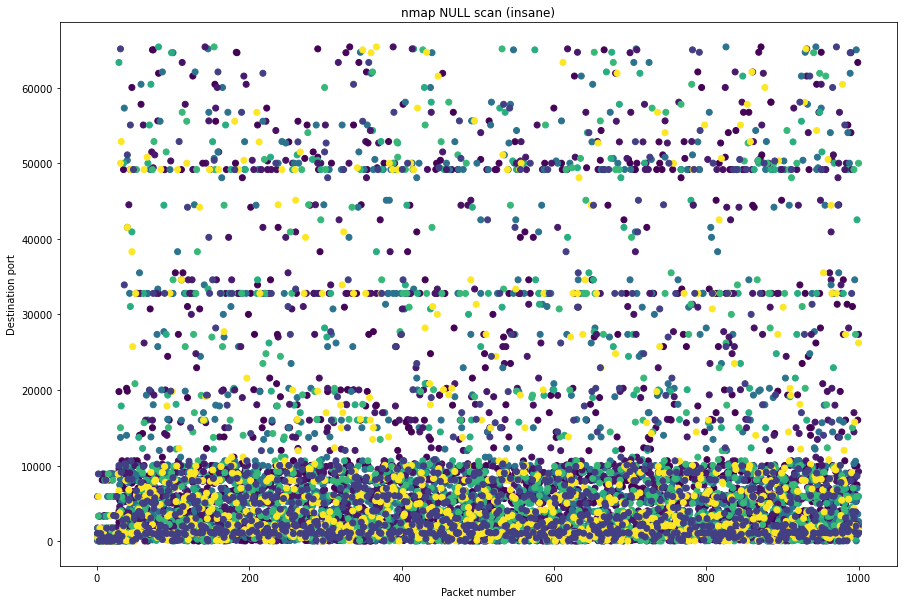

In [53]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [54]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [55]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

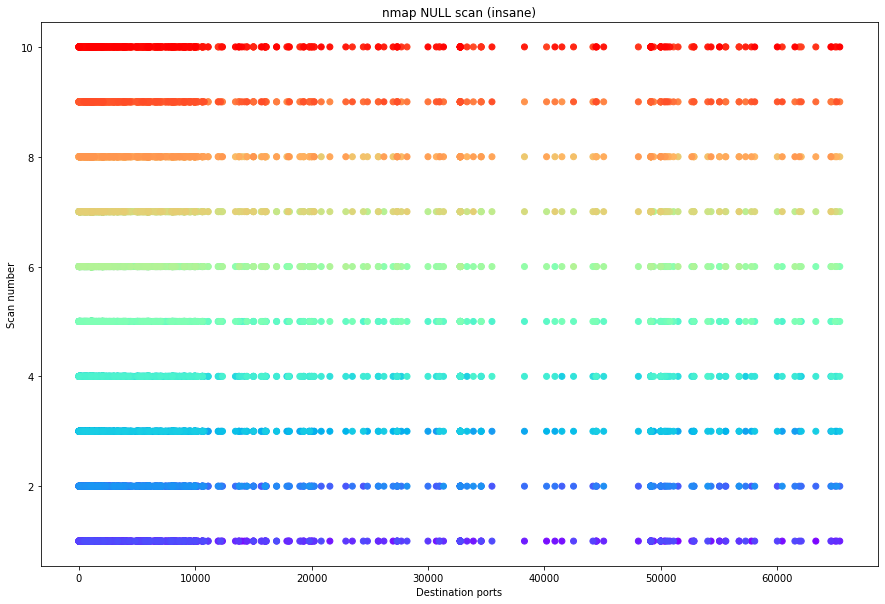

In [56]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [57]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

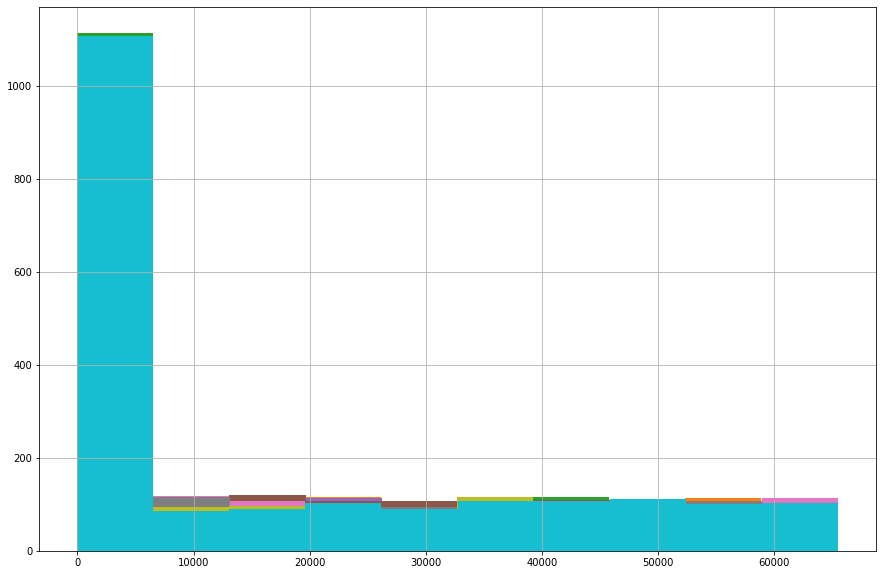

In [61]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

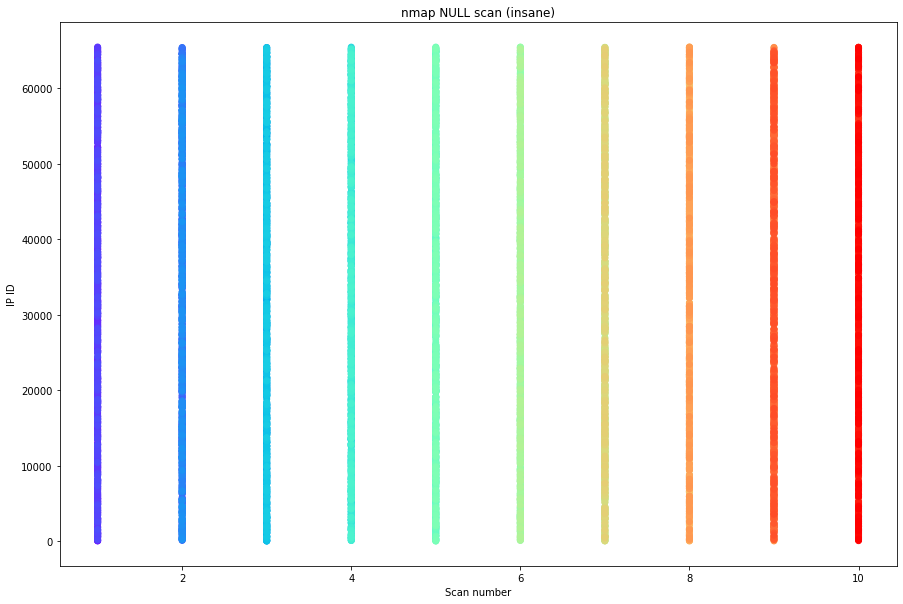

In [62]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

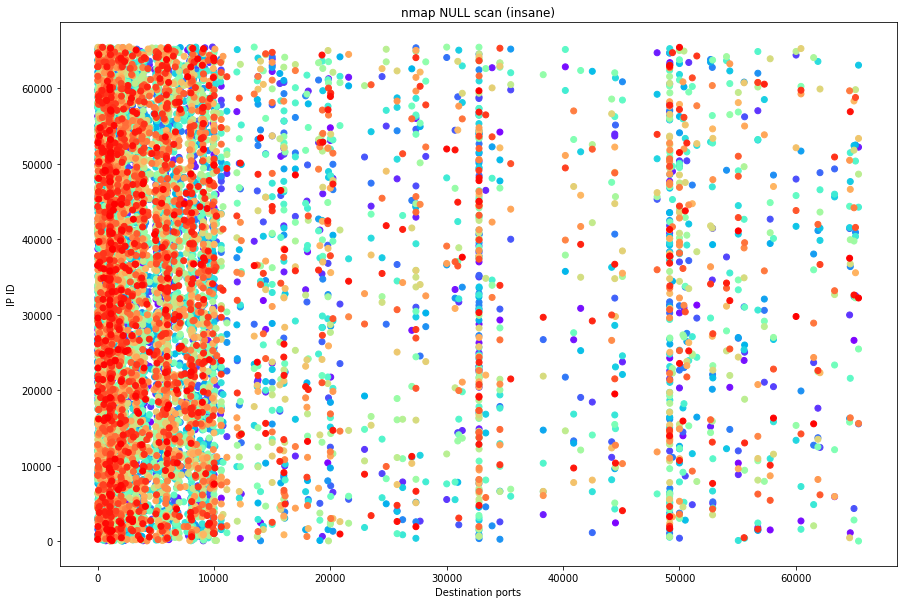

In [63]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

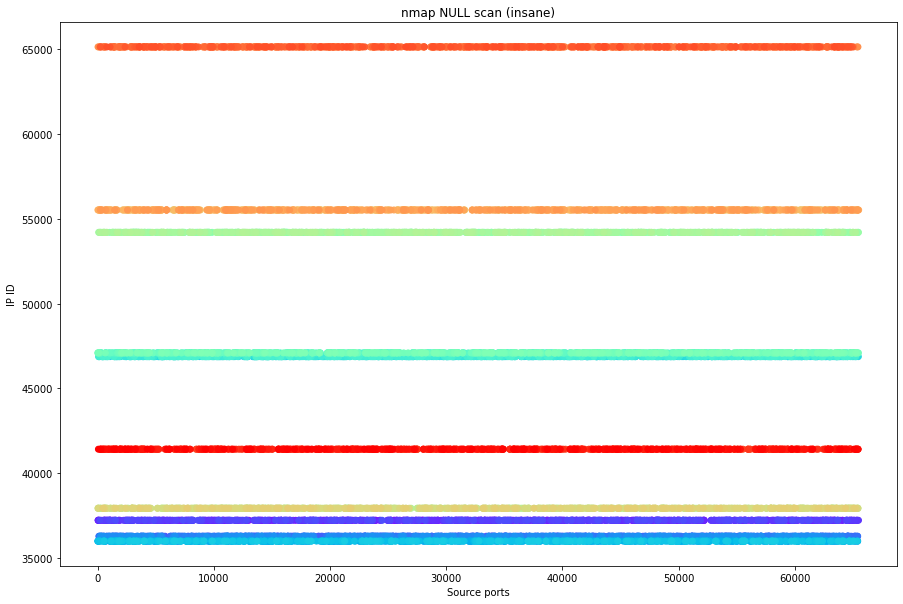

In [64]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [65]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [66]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [67]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 150

Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 1503370838
Sequence number: 150

Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 340

Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 3400939688
Sequence number: 340

Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 3928910346
Sequence number: 392

Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 2448453428
Sequence number: 244

Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 398

Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 3986154941
Sequence number: 398

Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
Sequence number: 579201484
S

Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 2396870347
Sequence number: 239

Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
S

Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
Sequence number: 183648577
S

Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
Sequence number: 656967116
S

Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 1546031437
Sequence number: 154

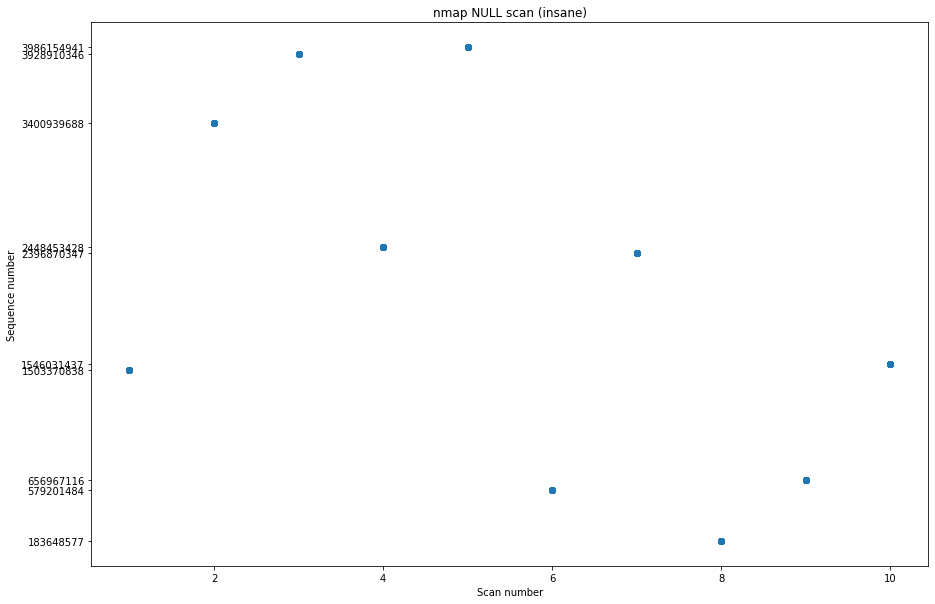

In [68]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

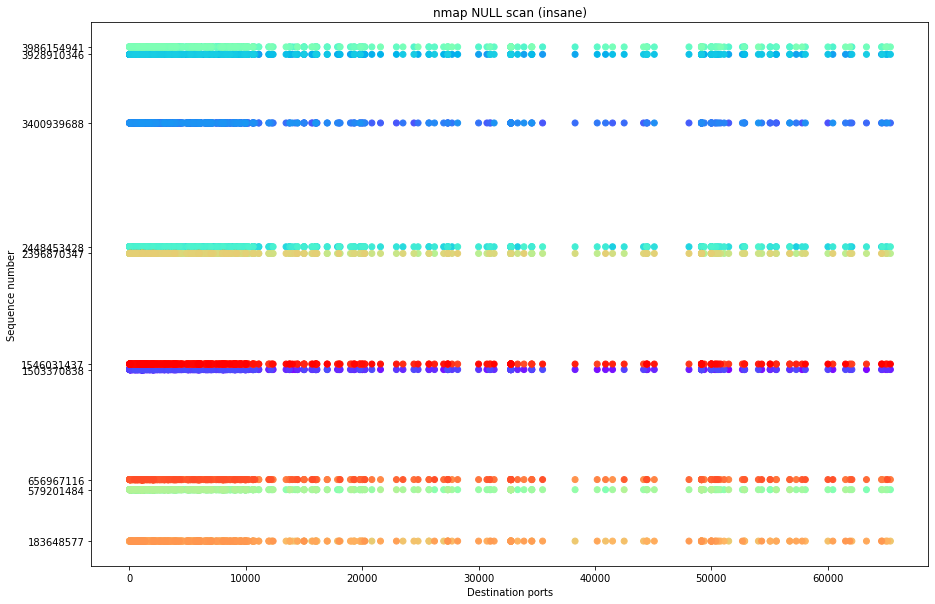

In [69]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

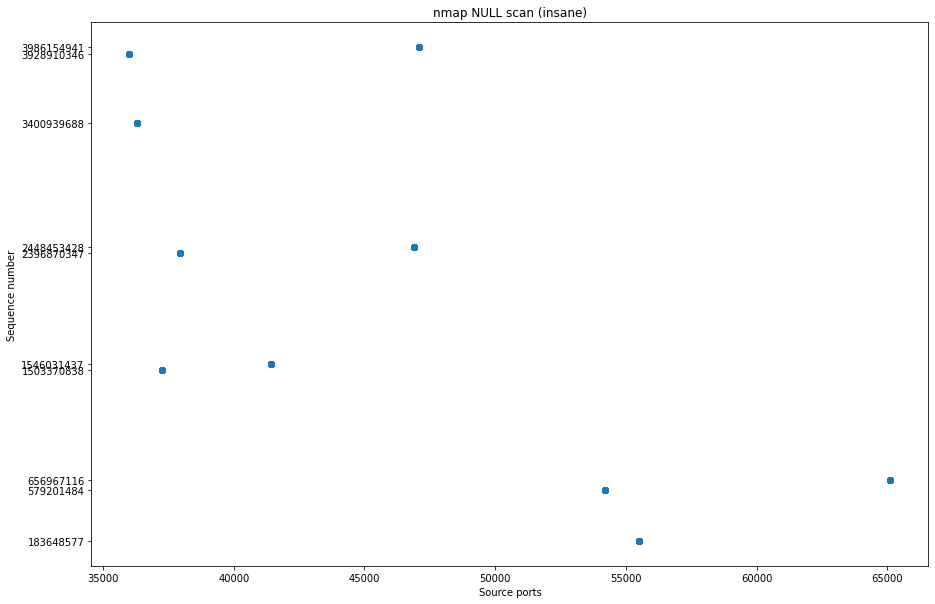

In [70]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()


In [71]:
len(set(orders_port['sport']))

10

## Flags

In [72]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan

Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan
Flags: nan